In [24]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, Aer
from qiskit.circuit.library import EfficientSU2
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import numpy as np

ansatz = EfficientSU2(6, entanglement='linear', reps=3, skip_final_rotation_layer=True).decompose()
ansatz.draw()


┌──────────┐ ┌──────────┐     ┌───────────┐┌───────────┐             »
q_0: ┤ Ry(θ[0]) ├─┤ Rz(θ[6]) ├──■──┤ Ry(θ[12]) ├┤ Rz(θ[18]) ├─────────────»
     ├──────────┤ ├──────────┤┌─┴─┐└───────────┘├───────────┤┌───────────┐»
q_1: ┤ Ry(θ[1]) ├─┤ Rz(θ[7]) ├┤ X ├──────■──────┤ Ry(θ[13]) ├┤ Rz(θ[19]) ├»
     ├──────────┤ ├──────────┤└───┘    ┌─┴─┐    └───────────┘├───────────┤»
q_2: ┤ Ry(θ[2]) ├─┤ Rz(θ[8]) ├─────────┤ X ├──────────■──────┤ Ry(θ[14]) ├»
     ├──────────┤ ├──────────┤         └───┘        ┌─┴─┐    └───────────┘»
q_3: ┤ Ry(θ[3]) ├─┤ Rz(θ[9]) ├──────────────────────┤ X ├──────────■──────»
     ├──────────┤┌┴──────────┤                      └───┘        ┌─┴─┐    »
q_4: ┤ Ry(θ[4]) ├┤ Rz(θ[10]) ├───────────────────────────────────┤ X ├────»
     ├──────────┤├───────────┤                                   └───┘    »
q_5: ┤ Ry(θ[5]) ├┤ Rz(θ[11]) ├────────────────────────────────────────────»
     └──────────┘└───────────┘                                            »
«                  ┌───────────┐┌───────────┐                          »
«q_0: ──────■──────┤ Ry(θ[24]) ├┤ Rz(θ[30]) ├───────────────────■──────»
«         ┌─┴─┐    └───────────┘├───────────┤┌───────────┐    ┌─┴─┐    »
«q_1: ────┤ X ├──────────■──────┤ Ry(θ[25]) ├┤ Rz(θ[31]) ├────┤ X ├────»
«     ┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐»
«q_2: ┤ Rz(θ[20]) ├────┤ X ├──────────■──────┤ Ry(θ[26]) ├┤ Rz(θ[32]) ├»
«     ├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤»
«q_3: ┤ Ry(θ[15]) ├┤ Rz(θ[21]) ├────┤ X ├──────────■──────┤ Ry(θ[27]) ├»
«     └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘»
«q_4: ──────■──────┤ Ry(θ[16]) ├┤ Rz(θ[22]) ├────┤ X ├──────────■──────»
«         ┌─┴─┐    ├───────────┤├───────────┤    └───┘        ┌─┴─┐    »
«q_5: ────┤ X ├────┤ Ry(θ[17]) ├┤ Rz(θ[23]) ├─────────────────┤ X ├────»
«         └───┘    └───────────┘└───────────┘                 └───┘    »
«                                         
«q_0: ────────────────────────────────────
«                                         
«q_1: ──────■─────────────────────────────
«         ┌─┴─┐                           
«q_2: ────┤ X ├──────────■────────────────
«     ┌───┴───┴───┐    ┌─┴─┐              
«q_3: ┤ Rz(θ[33]) ├────┤ X ├──────■───────
«     ├───────────┤┌───┴───┴───┐┌─┴─┐     
«q_4: ┤ Ry(θ[28]) ├┤ Rz(θ[34]) ├┤ X ├──■──
«     ├───────────┤├───────────┤└───┘┌─┴─┐
«q_5: ┤ Ry(θ[29]) ├┤ Rz(θ[35]) ├─────┤ X ├
«     └───────────┘└───────────┘     └───┘

In [25]:
from qiskit.quantum_info import DensityMatrix


qc = QuantumCircuit(6)

qubits = [0,1,2,3,4,5]
parameters = [ 3.11317963e+00,  4.13115199e+00,  4.29674847e-01, -1.52975630e+00,
        2.60415695e-01,  1.98079378e-01, -1.40842930e-01,  2.80300516e-01,
        2.95056543e-01,  2.43323580e-02, -4.08504070e-02,  5.11327297e-01,
       -2.02439945e-02,  4.58544776e-01,  5.70987146e-01, -1.12254762e-02,
        2.07061049e-01,  4.54376095e-01, -2.00549924e+00,  4.13272186e-01,
       -8.24440050e-02,  2.97016728e-01, -2.86139650e-02, -1.43951822e-01,
        1.55875114e+00,  8.33615771e-01, -1.45146699e+00,  2.21693445e-01,
        3.27873071e-01,  3.03459707e-01, -3.32164149e-03, -4.58021052e-01,
        6.69112706e-03,  3.41647268e-01,  1.59543434e-01, -1.62087871e-01]

for i in range(6):
    qc.ry(parameters[i], i)
    qc.rz(parameters[i+6], i)

for i in range(5):
    qc.cnot(i, i+1)

for i in range(6):
    qc.ry(parameters[i+12], i)
    qc.rz(parameters[i+18], i)

for i in range(5):
    qc.cnot(i, i+1)




# state = DensityMatrix(qc)
# print(state.to_statevector())
# print(np.trace(np.dot(state, state)))

# print(state.probabilities_dict())

# qc.measure_all()

# qc.draw()



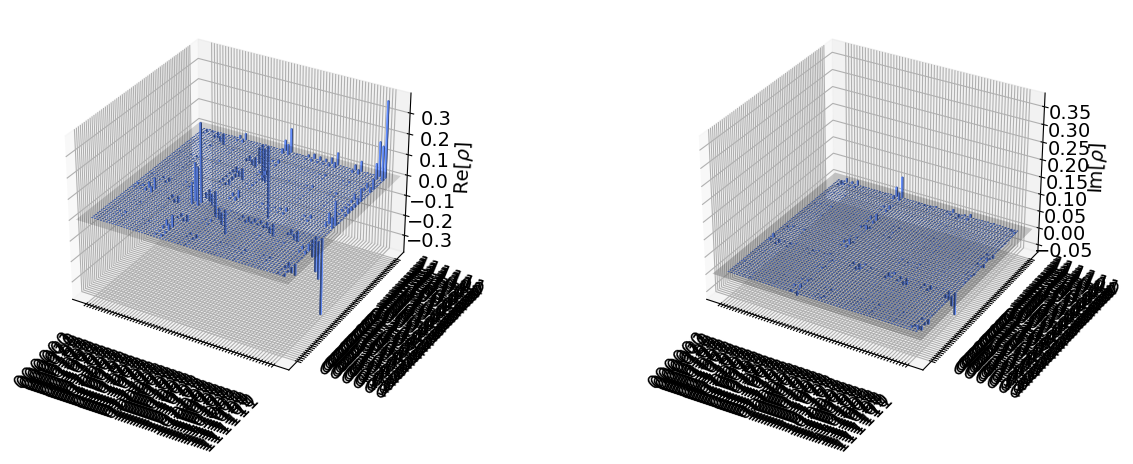

In [26]:
from qiskit import BasicAer
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(qc, backend)).result()
psi  = result.get_statevector(qc)

plot_state_city(psi)



In [45]:
np.linalg.norm(psi.real)
np.linalg.norm(psi.imag)

np.outer(psi, psi)



array([[-1.24045819e-08+9.78725932e-07j, -1.08701797e-06+2.41294378e-05j,
         1.68019022e-06-4.23078383e-06j, ...,
         2.03198887e-04-1.84526094e-04j, -1.58406793e-06+2.41986995e-06j,
         4.34146361e-04-4.17999841e-04j],
       [-1.08701797e-06+2.41294378e-05j, -4.60667202e-05+5.94261968e-04j,
         4.48166528e-05-1.03007356e-04j, ...,
         5.15896661e-03-4.38899670e-03j, -4.10006912e-05+5.84196102e-05j,
         1.10413881e-02-9.96309564e-03j],
       [ 1.68019022e-06-4.23078383e-06j,  4.48166528e-05-1.03007356e-04j,
        -1.43285340e-05+1.55858056e-05j, ...,
        -1.18927577e-03+4.63898714e-04j,  1.09018791e-05-7.87926856e-06j,
        -2.58042025e-03+1.09430791e-03j],
       ...,
       [ 2.03198887e-04-1.84526094e-04j,  5.15896661e-03-4.38899670e-03j,
        -1.18927577e-03+4.63898714e-04j, ...,
        -7.67024683e-02-6.42513496e-03j,  7.99315962e-04-1.37488429e-04j,
        -1.68752463e-01-9.18834909e-03j],
       [-1.58406793e-06+2.41986995e-06j, -4.

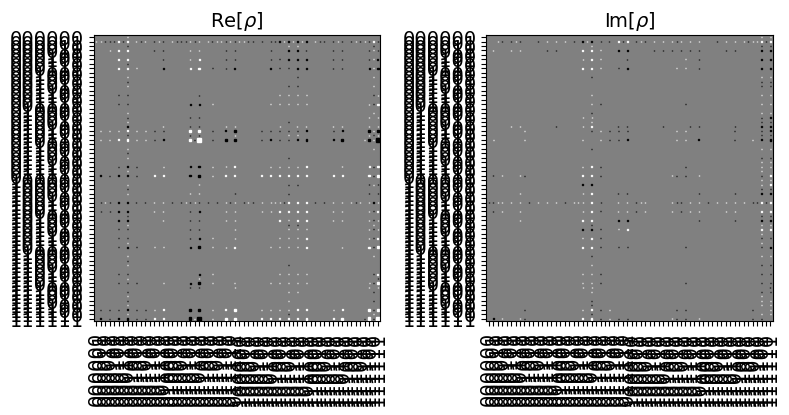

In [8]:
plot_state_hinton(psi)


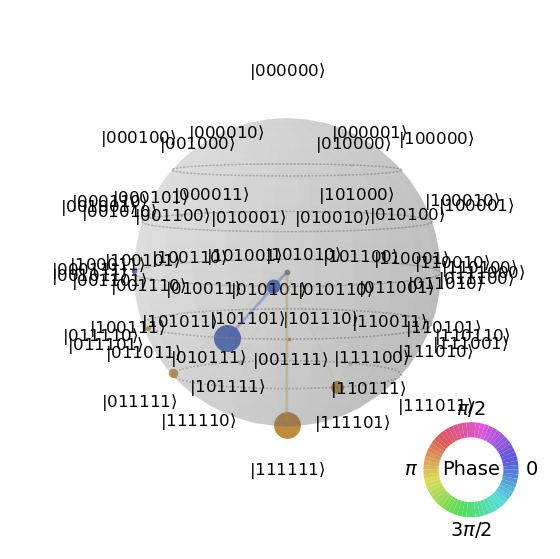

In [9]:
plot_state_qsphere(psi)

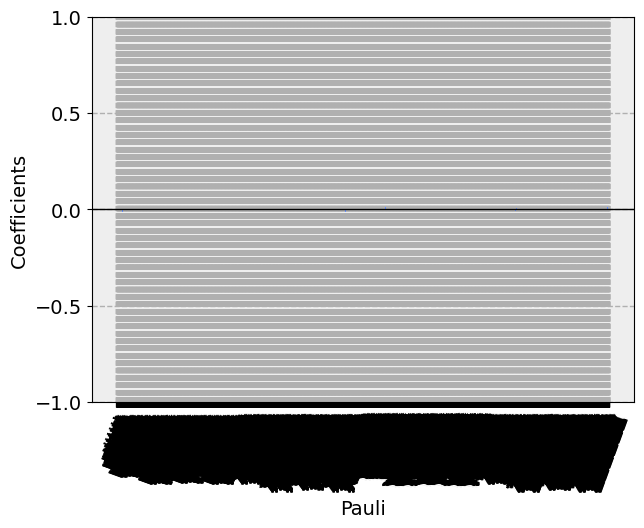

In [10]:
plot_state_paulivec(psi)

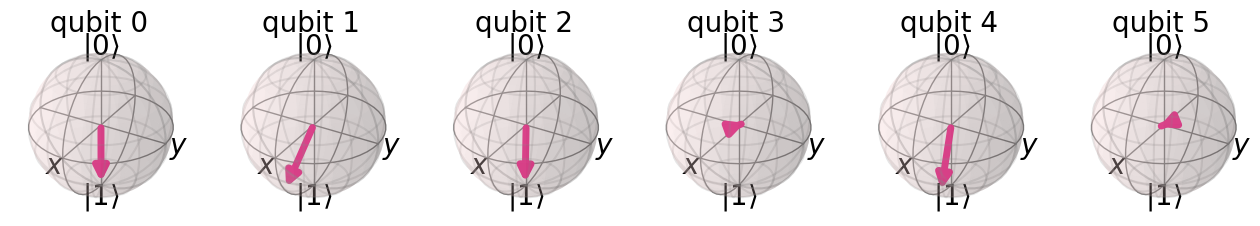

In [11]:
plot_bloch_multivector(psi)

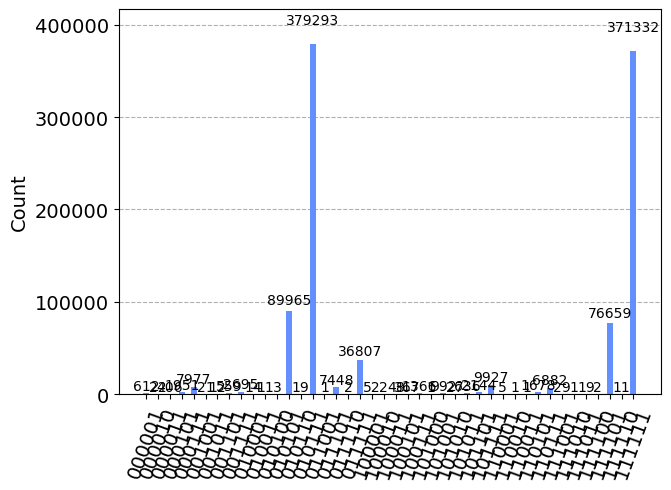

In [35]:
circuit = qc


# Use Aer's qasm_simulator
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000000)
result = job.result()

counts = result.get_counts(compiled_circuit)

plot_histogram(counts)

In [18]:
import numpy as np
params = (np.array([ 3.11317963e+00,  4.13115199e+00,  4.29674847e-01, -1.52975630e+00,
        2.60415695e-01,  1.98079378e-01, -1.40842930e-01,  2.80300516e-01,
        2.95056543e-01,  2.43323580e-02, -4.08504070e-02,  5.11327297e-01,
       -2.02439945e-02,  4.58544776e-01,  5.70987146e-01, -1.12254762e-02,
        2.07061049e-01,  4.54376095e-01, -2.00549924e+00,  4.13272186e-01,
       -8.24440050e-02,  2.97016728e-01, -2.86139650e-02, -1.43951822e-01,
        1.55875114e+00,  8.33615771e-01, -1.45146699e+00,  2.21693445e-01,
        3.27873071e-01,  3.03459707e-01, -3.32164149e-03, -4.58021052e-01,
        6.69112706e-03,  3.41647268e-01,  1.59543434e-01, -1.62087871e-01]) / np.pi)
(params*100).round() / 100

array([ 0.99,  1.31,  0.14, -0.49,  0.08,  0.06, -0.04,  0.09,  0.09,
        0.01, -0.01,  0.16, -0.01,  0.15,  0.18, -0.  ,  0.07,  0.14,
       -0.64,  0.13, -0.03,  0.09, -0.01, -0.05,  0.5 ,  0.27, -0.46,
        0.07,  0.1 ,  0.1 , -0.  , -0.15,  0.  ,  0.11,  0.05, -0.05])

In [11]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

def create_ansatz_1(num_qubits, layers = 1):
    qc = QuantumCircuit(num_qubits)
    for qubit in range(0, num_qubits, 2):
        qc.h(qubit)
        qc.cnot(qubit, qubit+1)

    j = 0
    for layer in range(layers):
        for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
        for qubit in range(num_qubits - 1):
            qc.cnot(qubit, qubit+1)
    return qc

def create_ansatz_2(num_qubits, layers = 1):
    qc = QuantumCircuit(num_qubits)
    j = 0
    for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
    for layer in range(layers):
        for qubit in range(num_qubits - 1):
            qc.cnot(qubit, qubit+1)
        for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
       
    return qc

def create_ansatz_3(num_qubits, layers = 1):
    qc = QuantumCircuit(num_qubits)
    j = 0
    for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
    for layer in range(layers):
        for qubit in range(0, num_qubits, 2):
            qc.h(qubit)
            qc.cnot(qubit, qubit+1)
        for qubit in range(num_qubits):
            qc.ry(Parameter('θ_' + str(j)), qubit)
            j += 1
       
    return qc


qc = create_ansatz_3(6, 2)
qc.draw()

┌─────────┐┌───┐     ┌─────────┐ ┌───┐     ┌──────────┐
q_0: ┤ Ry(θ_0) ├┤ H ├──■──┤ Ry(θ_6) ├─┤ H ├──■──┤ Ry(θ_12) ├
     ├─────────┤└───┘┌─┴─┐├─────────┤ └───┘┌─┴─┐├──────────┤
q_1: ┤ Ry(θ_1) ├─────┤ X ├┤ Ry(θ_7) ├──────┤ X ├┤ Ry(θ_13) ├
     ├─────────┤┌───┐└───┘├─────────┤ ┌───┐└───┘├──────────┤
q_2: ┤ Ry(θ_2) ├┤ H ├──■──┤ Ry(θ_8) ├─┤ H ├──■──┤ Ry(θ_14) ├
     ├─────────┤└───┘┌─┴─┐├─────────┤ └───┘┌─┴─┐├──────────┤
q_3: ┤ Ry(θ_3) ├─────┤ X ├┤ Ry(θ_9) ├──────┤ X ├┤ Ry(θ_15) ├
     ├─────────┤┌───┐└───┘├─────────┴┐┌───┐└───┘├──────────┤
q_4: ┤ Ry(θ_4) ├┤ H ├──■──┤ Ry(θ_10) ├┤ H ├──■──┤ Ry(θ_16) ├
     ├─────────┤└───┘┌─┴─┐├──────────┤└───┘┌─┴─┐├──────────┤
q_5: ┤ Ry(θ_5) ├─────┤ X ├┤ Ry(θ_11) ├─────┤ X ├┤ Ry(θ_17) ├
     └─────────┘     └───┘└──────────┘     └───┘└──────────┘